<a href="https://colab.research.google.com/github/hyeji0913/deeplearning/blob/main/tensorflow_linear_function_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. tortoise and hare,linear function

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
Tortoise_Speed = 1 #@param {type:"slider",min:0,max:10,step:1}
Tortoise_Bias = 4 #@param {type:"slider",min:0,max:10,step:1}
Hare_Speed = 2 #@param {type:"slider",min:0,max:10,step:1}

MAXVAL =10
INTERVAL = (MAXVAL*10) + 1
doMeet = False
t_xdata, t_ydata, h_xdata, h_ydata = [], [], [], []


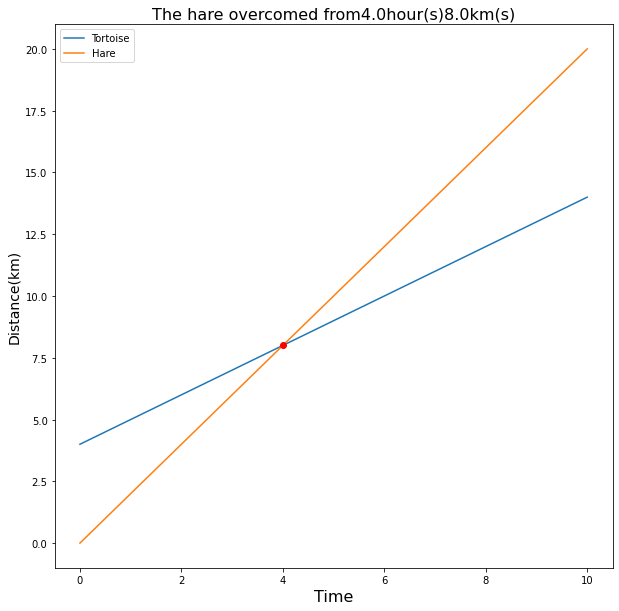

In [4]:
#from re import T
#configure figure size
plt.figure(figsize=(10,10))
for t in np.linspace(0,MAXVAL, INTERVAL):
    t_y = Tortoise_Speed*t + Tortoise_Bias
    h_y = Hare_Speed*t
    t_xdata.append(t)
    t_ydata.append(t_y)
    h_xdata.append(t)
    h_ydata.append(h_y)
    if(h_y >= t_y and (not doMeet)):
      doMeet = True
      meetTime = t
      meetDistance = t_y

plt.plot(t_xdata, t_ydata, label='Tortoise')
plt.plot(h_xdata, h_ydata, label='Hare')

if (doMeet):
    plt.title('The hare overcomed from'+str(math.ceil(meetTime*100)/100)+'hour(s)'+str(math.ceil(meetDistance*100)/100)+'km(s)',fontsize=16)
    plt.plot(meetTime,meetDistance,'ro')
else:
    plt.title('They will not mett',fontsize=16)
plt.xlabel('Time',fontsize=16)
plt.ylabel('Distance(km)', fontsize=14)
plt.legend()

plt.show()

#2. Tensorflow


In [5]:
import tensorflow as tf


In [6]:
learning_rate = 0.01
learning_epochs = 100

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1))

sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)

mse = tf.keras.losses.mean_squared_error
model.compile(loss=mse, optimizer=sgd)


In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


model training

In [21]:
h_history = model.fit(h_xdata, h_ydata, epochs=learning_epochs)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 5.7511
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 3.9319
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 3.7269
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 3.5688
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 3.3754
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 3.2344
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 3.1078
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 3.1876
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 2.8978
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 2.7797
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 2.7020
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 2.5749
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

In [23]:
t_history = model.fit(t_xdata, t_ydata, epochs=learning_epochs)

Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 4.7720
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 3.0345
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 2.8806
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 2.8273
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 2.6978
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 2.6818
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 2.5096
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 2.4808
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 2.3115
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 2.2037
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 2.1374
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 2.0682
Epoch 13/100
4/4 [==============================] - 0s 4ms/st

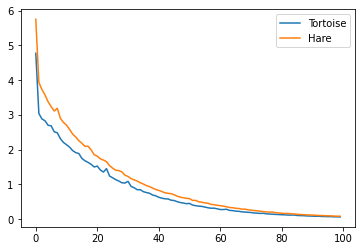

In [24]:
plt.plot(t_history.history['loss'],label='Tortoise')
plt.plot(h_history.history['loss'],label='Hare')

plt.legend()
plt.show()

In [13]:
result = model.predict([10])
print(result)

[[14.279321]]


In [14]:
p_ydata = model.predict(t_xdata)

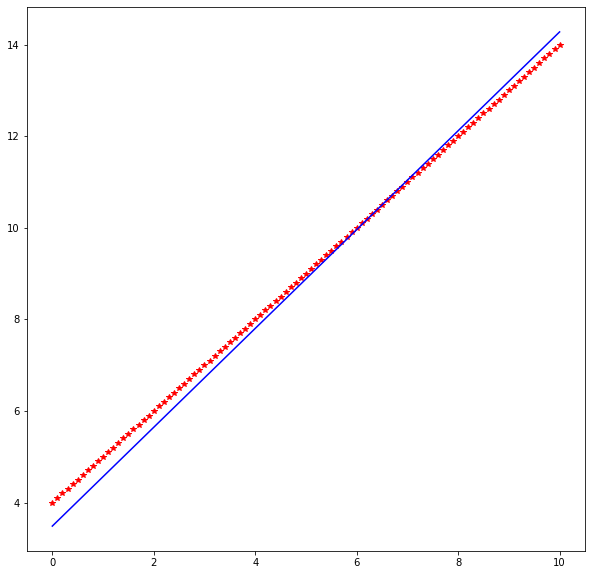

In [18]:
plt.figure(figsize=(10,10))

plt.plot(t_xdata, t_ydata, 'r*')
plt.plot(t_xdata, p_ydata, color='b')

plt.show()